# Transfer Learning with InceptionV3

## Import Libraries

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten

## Data Preprocessing

In [2]:
train_data_dir = 'Dataset/train & validation'

### Preview Data

In [3]:
# print("Sample day image:")
# plt.imshow(load_img(f"{os.path.join(day_dir, os.listdir(day_dir)[0])}"))
# plt.show()

# print("\nSample night image:")
# plt.imshow(load_img(f"{os.path.join(night_dir, os.listdir(night_dir)[0])}"))
# plt.show()

### Image Augmentation

In [4]:
IMAGE_SIZE = 150
BATCH_SIZE = 32

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                #    rotation_range=40,
                                #    width_shift_range=0.2,
                                #    height_shift_range=0.2,
                                #    shear_range=0.2,
                                #    zoom_range=0.2,
                                #    horizontal_flip=True,
                                #    fill_mode='nearest'
                                validation_split=0.2)

In [6]:
# Set up the data generator for training and validation
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(train_data_dir,
                                                         target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                         batch_size=BATCH_SIZE,
                                                         class_mode='categorical',
                                                         subset='validation')

Found 1037 images belonging to 5 classes.
Found 258 images belonging to 5 classes.


## Modelling

### Pre-Trained Model Load

In [7]:
# Load the pre-trained InceptionV3 model
incv3 = tf.keras.applications.InceptionV3(weights='imagenet',
                                          include_top=False,
                                          input_shape=(150, 150, 3))

# Freeze the weights of the pre-trained layers
for layer in incv3.layers:
    incv3.trainable = False

### Fine Tuning

In [8]:
# Add your custom layers on top of the pre-trained model
model = Sequential([
    incv3,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Look at model arshitecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 26,522,917
Trainable params: 4,720,133
Non-trainable params: 21,802,784
_________________________________________________________________


In [9]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
33/33 [==============================] - 17s 436ms/step - loss: 7.7172 - accuracy: 0.6721 - val_loss: 1.6466 - val_accuracy: 0.7558
Epoch 2/10
33/33 [==============================] - 15s 448ms/step - loss: 0.1996 - accuracy: 0.9344 - val_loss: 1.2923 - val_accuracy: 0.8023
Epoch 3/10
33/33 [==============================] - 14s 415ms/step - loss: 0.0621 - accuracy: 0.9778 - val_loss: 1.1218 - val_accuracy: 0.7868
Epoch 4/10
33/33 [==============================] - 14s 411ms/step - loss: 0.0239 - accuracy: 0.9961 - val_loss: 1.2353 - val_accuracy: 0.7946
Epoch 5/10
33/33 [==============================] - 15s 444ms/step - loss: 0.0133 - accuracy: 0.9990 - val_loss: 1.2781 - val_accuracy: 0.7984
Epoch 6/10
33/33 [==============================] - 15s 440ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.3118 - val_accuracy: 0.7868
Epoch 7/10
33/33 [==============================] - 14s 417ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.3156 - val_accuracy: 0.7984

## Model Evaluation

In [10]:
def plot_graghs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

### Accuracy

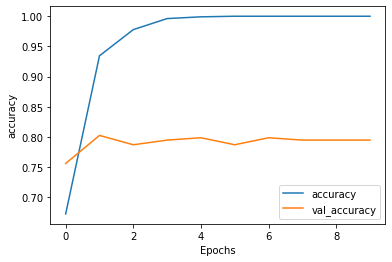

In [11]:
plot_graghs(history, 'accuracy')

### Loss

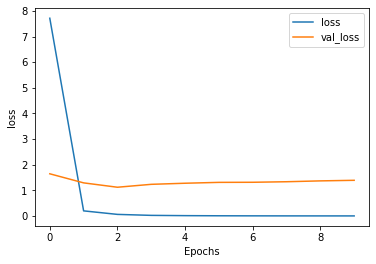

In [12]:
plot_graghs(history, 'loss')

## Model Predictions

In [13]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

label = ['Keyboard', 'Laptop', 'Monitor', 'Mouse', 'Phone']
for fn in os.listdir('Dataset/test'):
  path = './Dataset/test/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  for i, l in zip(classes[0], label):
    print("{} : {:.2%}".format(l, i))

1/1 [==============================] - 1s 992ms/step
keyboard.jpg
Keyboard : 51.29%
Laptop : 48.71%
Monitor : 0.00%
Mouse : 0.00%
Phone : 0.00%
1/1 [==============================] - 0s 64ms/step
laptop_0,5_mati.jpg
Keyboard : 0.00%
Laptop : 99.83%
Monitor : 0.08%
Mouse : 0.00%
Phone : 0.10%
1/1 [==============================] - 0s 45ms/step
laptop_hidup.jpg
Keyboard : 0.00%
Laptop : 100.00%
Monitor : 0.00%
Mouse : 0.00%
Phone : 0.00%
1/1 [==============================] - 0s 41ms/step
laptop_mati.jpg
Keyboard : 0.00%
Laptop : 99.94%
Monitor : 0.04%
Mouse : 0.00%
Phone : 0.03%
1/1 [==============================] - 0s 39ms/step
monitor_hidup.jpg
Keyboard : 0.16%
Laptop : 99.83%
Monitor : 0.00%
Mouse : 0.00%
Phone : 0.01%
1/1 [==============================] - 0s 42ms/step
monitor_mati.jpg
Keyboard : 0.00%
Laptop : 0.09%
Monitor : 50.86%
Mouse : 0.01%
Phone : 49.04%
1/1 [==============================] - 0s 45ms/step
mouse.jpg
Keyboard : 0.00%
Laptop : 0.00%
Monitor : 81.87%
Mouse : 15

## Save the Model

In [14]:
# Save the model
# model.save('e_waste_classifier.h5')